# Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

1. Which variables are significant in predicting the price of a house, and
2. How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

# Business Goal 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [902]:
# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [903]:
#Importing the necessary Libraries

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn import metrics


import statsmodels.api as sm  

In [904]:
# read data into a first data frame
df_data=pd.read_csv("train.csv")

# display first five rows
df_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [905]:
#Check to see the information about columns, data types and the columns having Non-Null values
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [906]:
# check how many entries there are in the dataset 
df_data.shape

(1460, 81)

# Data Cleaning

In [907]:
# check the amount of missing values in the columns
df_data.isnull().sum()[df_data.isnull().sum()>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [908]:
#check the percentage of missing data to make decisions on working with the missing data
nullval = pd.DataFrame(round(df_data.isnull().sum()/len(df_data.index)*100,2).sort_values(ascending=False),columns=["Null values in %"])
nullval.index.name = 'Feature names'
nullval.head(20)

,Null values in %
Feature names,
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
FireplaceQu,47.26
LotFrontage,17.74
GarageYrBlt,5.55
GarageCond,5.55
GarageType,5.55


## Observations

* From the above table we infer that columns like PoolQC, MiscFeature, Alley, Fence have more than 80% blank value which can be dropped as part of the data cleanup  

In [909]:
#Drop Alley column because more than 90% values are missing or No Alley
df_data=df_data.drop(columns=['Alley','PoolQC','MiscFeature','Fence'])

In [910]:
# check the amount of missing values in the columns
df_data.isnull().sum()[df_data.isnull().sum()>0]

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

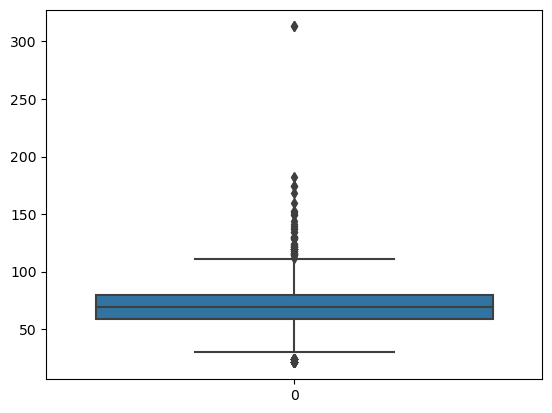

In [911]:
#PLots for outlier analysis for LotFrontage
sns.boxplot(df_data.LotFrontage)
plt.show()

## Observation

* Since there are outliers between 200 -350, so we will update missing values using Median

In [912]:
df_data['LotFrontage'].fillna(df_data['LotFrontage'].median(),inplace=True)

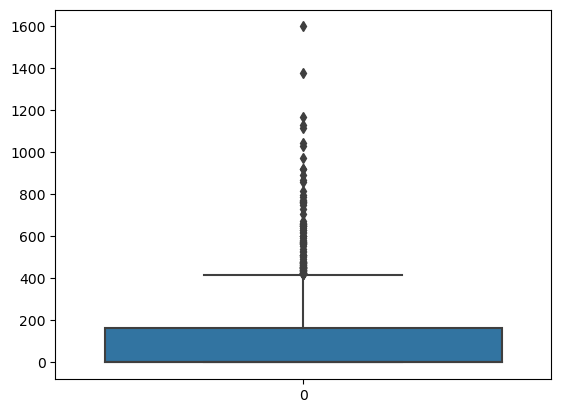

In [913]:
#PLots for outlier analysis for MasVnrArea
sns.boxplot(df_data.MasVnrArea)
plt.show()

In [914]:
#input missing values of MasVnrArea with median due to some outliers in data shown from Box Plot
df_data.MasVnrArea = df_data.MasVnrArea.fillna(df_data.MasVnrArea.median())   

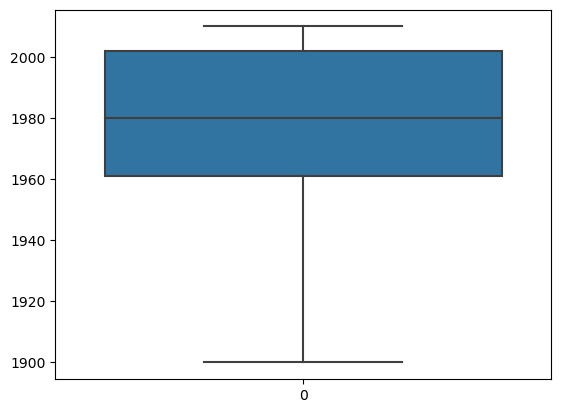

In [915]:
#PLots for outlier analysis for GarageYrBlt
sns.boxplot(df_data.GarageYrBlt)
plt.show()

## Observation 

* No outiers so imputing missing values with mean

In [916]:
#Update missing values of GarageYrBlt with mean
df_data['GarageYrBlt'].fillna(df_data['GarageYrBlt'].mean(),inplace=True)

In [917]:
df_data.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [918]:
# Most of the values is BrkFace , so we can map the NAN values of 'MasVnrType' to BrkFace -MODE
df_data.MasVnrType = df_data.MasVnrType.fillna('BrkFace')

In [919]:
df_data.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [920]:
#Since there is no clear majority of variable we will create a new variable as NA which signifies No Fireplace
df_data.FireplaceQu = df_data.FireplaceQu.fillna('NA')

In [921]:
df_data.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [922]:
#Since there is no clear majority of variable we will create a new variable as NA which signifies No Basement
df_data.BsmtQual = df_data.BsmtQual.fillna('NA')

In [923]:
#categorical values: imputing the mode
for col in ('BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','GarageType','GarageFinish','GarageQual','GarageCond'):
    
  print(df_data[col].value_counts())

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64
No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64


In [924]:
#We will use the mode for the columns which are showing clear max type like

for col in ('BsmtCond','BsmtExposure','BsmtFinType2','Electrical','GarageType','GarageFinish','GarageQual','GarageCond'):
    df_data[col] = df_data[col].fillna(df_data[col].mode()[0])

In [925]:
#categorical values: imputing the mode
for col in ('BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','GarageType','GarageFinish','GarageQual','GarageCond'):
    
  print(df_data[col].value_counts())

TA    1348
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64
No    991
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64
Unf    1294
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64
Attchd     951
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
Unf    686
RFn    422
Fin    352
Name: GarageFinish, dtype: int64
TA    1392
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64
TA    1407
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64


In [926]:
# check the amount of missing values remaining in the columns
df_data.isnull().sum()[df_data.isnull().sum()>0]

BsmtFinType1    37
dtype: int64

In [927]:
#Since there is no clear majority of variable we will create a new variable as NA which signifies No Basement
df_data.BsmtFinType1 = df_data.BsmtFinType1.fillna('NA')

In [928]:
# Final check missing values in the columns
df_data.isnull().sum()[df_data.isnull().sum()>0]

Series([], dtype: int64)

In [929]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [930]:
#Deriving a new column Age of building and dropping the other columns. 
df_data['BuildingAge']=df_data['YrSold']-df_data['YearBuilt']
df_data['BuildingAge'].head()

0     5
1    31
2     7
3    91
4     8
Name: BuildingAge, dtype: int64

In [931]:
#Drop columns the below columns since we already have a Derived Age column 
df_data=df_data.drop(['YrSold', 'MoSold','YearBuilt','YearRemodAdd'], axis = 1) 

In [932]:
#Drop ID column since this just a unique serial value and wont contribute to analysis
df_data=df_data.drop(['Id'], axis = 1) 

In [933]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  RoofStyle      1460 non-null   object 
 18  RoofMatl

# Identifying correlations

In [934]:
# all numeric (float and int) variables in the dataset
df_data_num = df_data.select_dtypes(include=['float64', 'int64'])
df_data_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,BuildingAge
0,60,65.0,8450,7,5,196.0,706,0,150,856,...,548,0,61,0,0,0,0,0,208500,5
1,20,80.0,9600,6,8,0.0,978,0,284,1262,...,460,298,0,0,0,0,0,0,181500,31
2,60,68.0,11250,7,5,162.0,486,0,434,920,...,608,0,42,0,0,0,0,0,223500,7
3,70,60.0,9550,7,5,0.0,216,0,540,756,...,642,0,35,272,0,0,0,0,140000,91
4,60,84.0,14260,8,5,350.0,655,0,490,1145,...,836,192,84,0,0,0,0,0,250000,8


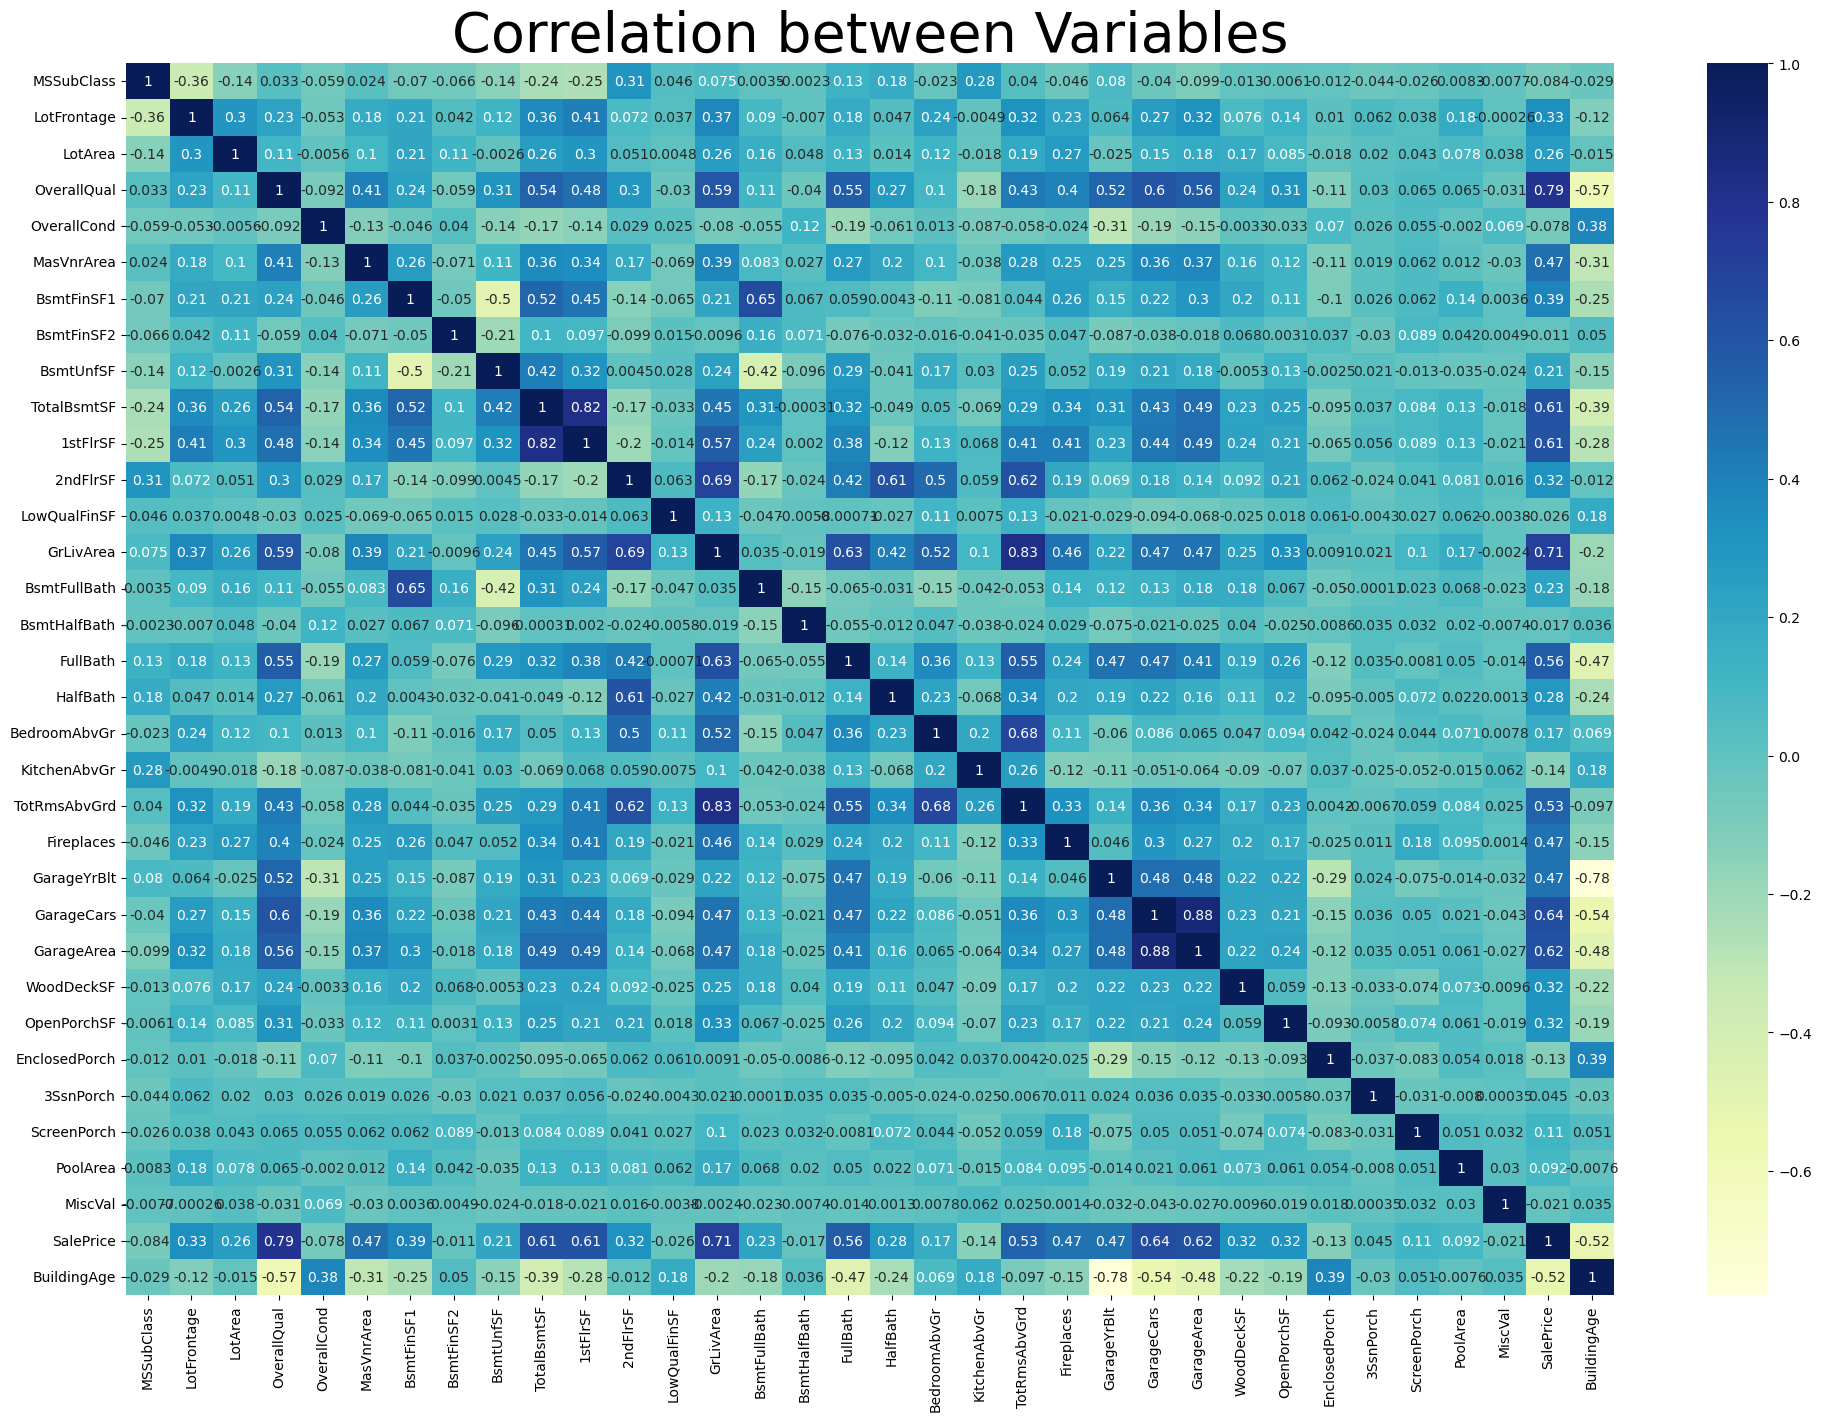

In [935]:
# correlation matrix
cor = df_data_num.corr()

# plotting correlations on a heatmap

plt.figure(figsize=(24,16))
#plt.xticks(fontsize=30)
#plt.yticks(fontsize=30)

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.title("Correlation between Variables", fontsize=40)
plt.show()

## Observation 

SalePrice is very high positively correlated with 

1. Overall Quality(0.79)
2. GrLivArea (0.71)
3. 1stFlrSF (0.61)
4. TotalBsmtSF (0.61)
5. GarageCars(0.64)
6. GarageArea(0.62)
7. FullBath(0.58)
8. TotRmsAbvGrd(0.55)

And negatively correlated to  
1. Age(-0.52)

<Figure size 1000x500 with 0 Axes>

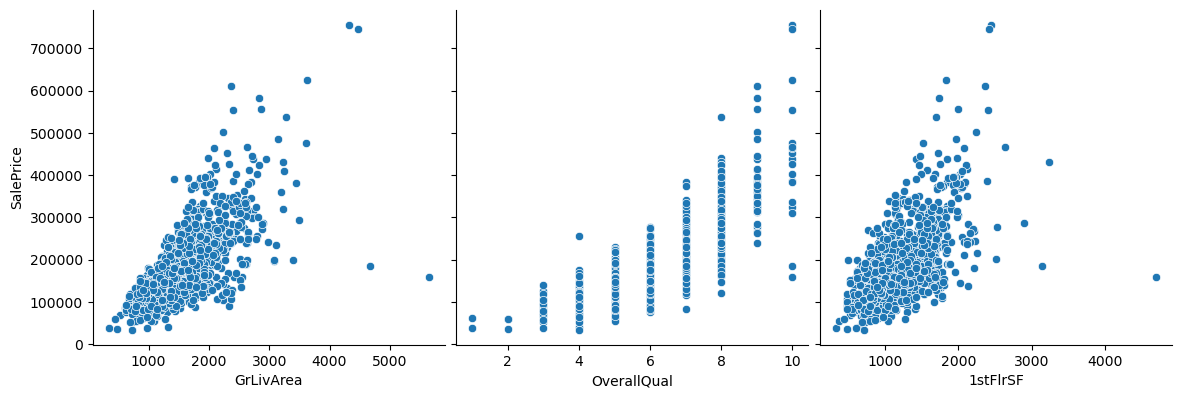

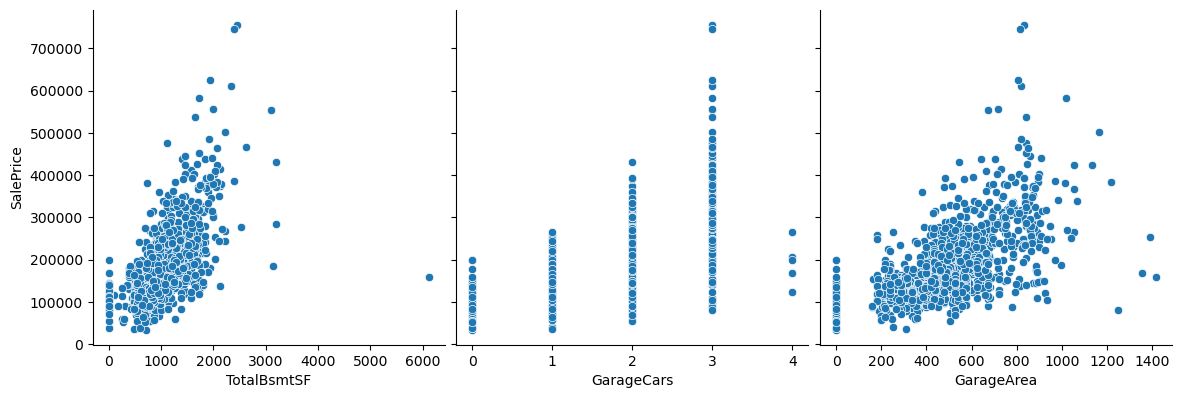

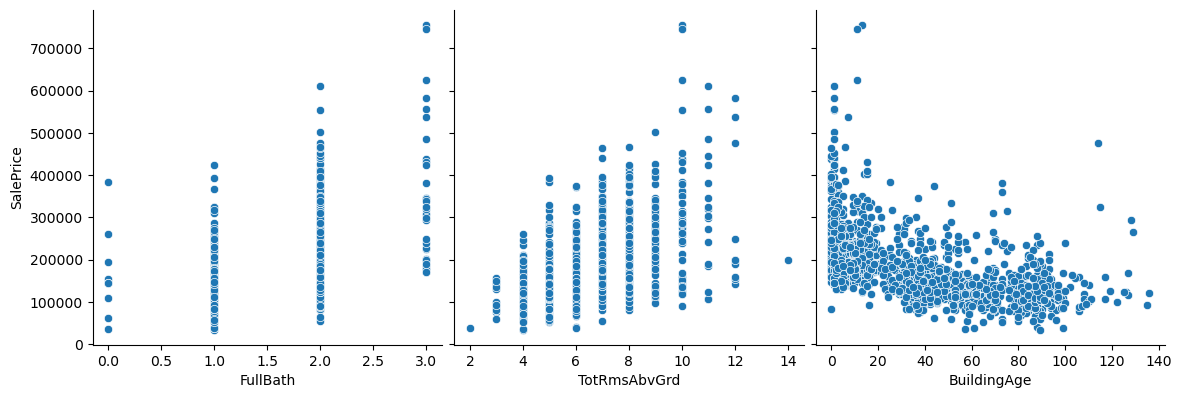

In [936]:
# Check the numerical values using pairplots

plt.figure(figsize=(10,5))
sns.pairplot(df_data_num, x_vars=['GrLivArea','OverallQual','1stFlrSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df_data_num, x_vars=['TotalBsmtSF', 'GarageCars','GarageArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df_data_num, x_vars=['FullBath', 'TotRmsAbvGrd','BuildingAge'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
plt.show()

## Data Processing of Categorical Columns

In [937]:
# List of variables to map
def map_function(x):
    return x.map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0})
def map_function1(x):
    return x.map({'Gd':4,'Av':3,'Mn':2,'No':1,'NA':0})
def map_function2(x):
    return x.map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0})
def map_function3(x):
    return x.map({'Y':1,'N':0})
def map_function4(x):
    return x.map({'Typ':8,'Min1':7,'Min2':6,'Mod':5,'Maj1':4,'Maj2':3,'Sev':2,'Sal':1})
def map_function5(x):
    return x.map({'Fin':3,'RFn':2,'Unf':1,'NA':0,'Unknown':0})
def map_function6(x):
    return x.map({'Y':2,'P':2,'N':0})

df_data['ExterQual'] = df_data[['ExterQual']].apply(map_function)
df_data['ExterCond'] = df_data[['ExterCond']].apply(map_function)
df_data['BsmtQual'] = df_data[['BsmtQual']].apply(map_function)
df_data['BsmtCond'] = df_data[['BsmtCond']].apply(map_function)
df_data['BsmtExposure'] = df_data[['BsmtExposure']].apply(map_function1)
df_data['BsmtFinType1'] = df_data[['BsmtFinType1']].apply(map_function2)
df_data['BsmtFinType2'] = df_data[['BsmtFinType2']].apply(map_function2)
df_data['HeatingQC'] = df_data[['HeatingQC']].apply(map_function)
df_data['CentralAir'] = df_data[['CentralAir']].apply(map_function3)
df_data['KitchenQual'] = df_data[['KitchenQual']].apply(map_function)
df_data['Functional'] = df_data[['Functional']].apply(map_function4)
df_data['GarageFinish'] = df_data[['GarageFinish']].apply(map_function5)
df_data['GarageQual'] = df_data[['GarageQual']].apply(map_function)
df_data['GarageCond'] = df_data[['GarageCond']].apply(map_function)
df_data['PavedDrive'] = df_data[['PavedDrive']].apply(map_function6)
df_data['FireplaceQu'] = df_data[['FireplaceQu']].apply(map_function)

In [938]:
# One more Final check missing values in the columns before Training the data
df_data.BsmtExposure.value_counts()

1    991
3    221
4    134
2    114
Name: BsmtExposure, dtype: int64

In [939]:
# Creating dummies
dummy = pd.get_dummies(df_data[['MSSubClass','MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical',
       'GarageType', 'SaleType', 'SaleCondition']], drop_first=True)
dummy.head()

,MSSubClass,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,0,0,1,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,20,0,0,1,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,60,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,70,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,60,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [940]:
# Adding the results back to the cleaned dataframe
df_data = pd.concat([df_data, dummy], axis=1)
df_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,1,0,0,0,1,0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,1,0,0,0,1,0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,1,0,0,0,1,0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,1,0,0,0,0,0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,1,0,0,0,1,0


In [941]:
# Dropping the columns whose dummies have been created
df_data=df_data.drop(['MSSubClass','MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical',
       'GarageType', 'SaleType', 'SaleCondition'], axis = 1)

In [942]:
df_data.shape

(1460, 193)

In [943]:
# One more Final check missing values in the columns before Training the data
df_data.isnull().sum()[df_data.isnull().sum()>0]

Series([], dtype: int64)

## Model Data

In [944]:
# model building - Test Train split
np.random.seed(0)
df_train,df_test = train_test_split(df_data, train_size=0.7,random_state=100)
print(df_train.shape)
print(df_test.shape)

(1021, 193)
(439, 193)


In [945]:
#create the training and test test bed
y_train=df_train.pop('SalePrice')
X_train=df_train

In [946]:
y_test=df_test.pop('SalePrice')
X_test=df_test

## Data Scaling

In [947]:
#1. Instantiate an scaler object
scaler=MinMaxScaler()
numeric_feats = X_train.dtypes[X_train.dtypes != "object"].index
X_train[numeric_feats]=scaler.fit_transform(X_train[numeric_feats])

X_test[numeric_feats]=scaler.transform(X_test[numeric_feats])

In [948]:
# 2. Applying RFE technique
lm = LinearRegression()  # Instantiating
lm.fit(X_train, y_train)

LinearRegression()

In [949]:
#Coefficients , intercepts

print(lm.coef_)
print(lm.intercept_)

[ 4.08070084e+04  1.13164032e+05  6.73496431e+04  4.38862875e+04
  4.78072736e+04  1.96843024e+04 -1.64771699e+04  9.67710593e+03
 -7.52762753e+03  1.95817440e+04 -3.25240109e+03 -1.15635002e+15
 -8.67969827e+02 -3.01995026e+14 -4.78602700e+14  1.25182470e+15
  1.48539912e+02 -2.25704133e+03 -1.98769420e+15 -9.50136231e+14
 -2.36958915e+14  2.39443532e+15  8.46579412e+03  3.03586465e+03
 -8.28268992e+03 -4.10368997e+03 -4.79444503e+04 -3.23200110e+04
  1.67311488e+04  1.49489365e+04  3.94432048e+04  1.50793166e+04
 -7.14476221e+03  1.88230202e+04  3.51768584e+03  9.66763448e+03
  2.92342412e+03  1.98232360e+04 -9.92278929e+03  3.85654694e+02
  2.77834713e+03  1.06084683e+04 -4.97732290e+03  1.62381603e+04
  7.25581230e+03  5.90647083e+04  1.14069275e+04 -3.98163859e+04
  2.35659483e+04  2.81441188e+04  2.70585064e+04  2.13400953e+04
  1.88550371e+04  4.13624179e+03 -1.73220603e+03  3.28561086e+03
  6.97892061e+03 -8.54736541e+03  3.34101227e+03 -1.06447958e+04
  1.07576807e+04 -2.02503

In [950]:
# Running RFE with the output number of the variable equal to 30

rfe = RFE(lm, n_features_to_select=30)
rfe = rfe.fit(X_train, y_train) 
print(rfe.support_)        #True or False   
print(rfe.ranking_)

[ True  True  True  True False  True False False False False False  True
 False False False  True False False  True  True False  True False False
 False False  True  True False False  True False False False False False
 False False False False False False False False False  True False  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True  True False False False False False
 False False False False False False False False False False False False
 False  True  True  True  True  True  True  True False False False False
 False False False False False  True False False False False False False
 False False  True False False False False False  True False False False
 False False False False False False  True False Fa

In [951]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 77),
 ('ExterQual', True, 1),
 ('ExterCond', False, 40),
 ('BsmtQual', False, 45),
 ('BsmtCond', False, 92),
 ('BsmtExposure', False, 9),
 ('BsmtFinType1', False, 123),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinType2', False, 152),
 ('BsmtFinSF2', False, 22),
 ('BsmtUnfSF', False, 23),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', False, 156),
 ('CentralAir', False, 138),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 21),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 90),
 ('BsmtHalfBath', False, 126),
 ('FullBath', False, 109),
 ('HalfBath', False, 112),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', True, 1),
 ('KitchenQual', False, 7),
 ('TotRmsAbvGrd', False, 69),
 ('Functional', True, 1),
 ('Fireplaces', False, 99),
 ('FireplaceQu', False, 100),
 ('GarageYrBlt', False, 13),
 ('GarageFinish', False, 118),
 ('GarageCars', False, 34),
 ('G

In [952]:
sum(rfe.support_)

30

In [953]:
col = X_train.columns[rfe.support_]
col

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'ExterQual',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BedroomAbvGr', 'KitchenAbvGr', 'Functional', 'PoolArea', 'BuildingAge',
       'Condition2_PosN', 'Condition2_RRAe', 'RoofMatl_CompShg',
       'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll',
       'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl',
       'Exterior1st_Stone', 'Exterior2nd_CmentBd', 'Exterior2nd_Stone',
       'Foundation_Slab', 'Heating_OthW', 'SaleType_Con'],
      dtype='object')

In [954]:
# Exclude columns to make the model according to RFE
X_train.columns[~rfe.support_]

Index(['MasVnrArea', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'HeatingQC',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=162)

## Model Building  using statsmodel

In [955]:
# Creating an X_train dataframe to build the first model with features selected by RFE technique
X_train_rfe =X_train[col]

In [956]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [957]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [958]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     264.3
Date:                Mon, 27 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:39:07   Log-Likelihood:                -11841.
No. Observations:                1021   AIC:                         2.374e+04
Df Residuals:                     990   BIC:                         2.390e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -9.006e+05   3

In [959]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,1771.55
10,GrLivArea,133.66
9,2ndFlrSF,91.02
8,1stFlrSF,77.77
18,RoofMatl_CompShg,27.15
22,RoofMatl_Tar&Grv,10.06
23,RoofMatl_WdShake,7.33
24,RoofMatl_WdShngl,6.91
7,TotalBsmtSF,6.04
3,OverallQual,3.44


## Observation 

We generally want a VIF that is less than 5. So there are clearly some variables we need to drop

### Dropping the variable and updating the model
* Dropping GrLivArea p-value is 0.600 and VIF 133.66

In [960]:
# Dropping highly correlated variables
X_train_rfe = X_train_rfe.drop('GrLivArea', axis=1)
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     273.6
Date:                Mon, 27 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:39:07   Log-Likelihood:                -11841.
No. Observations:                1021   AIC:                         2.374e+04
Df Residuals:                     991   BIC:                         2.389e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -9.017e+05   3

* Droping Condition2_RRAe because p-value is >0.05

In [961]:
X_train_rfe = X_train_rfe.drop('Condition2_RRAe', axis=1)
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model


print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     283.3
Date:                Mon, 27 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:39:07   Log-Likelihood:                -11842.
No. Observations:                1021   AIC:                         2.374e+04
Df Residuals:                     992   BIC:                         2.389e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -9.011e+05   3

* Droping Exterior1st_Stone because p-value is >0.05

In [962]:

X_train_rfe = X_train_rfe.drop('Exterior1st_Stone', axis=1)
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     292.9
Date:                Mon, 27 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:39:07   Log-Likelihood:                -11844.
No. Observations:                1021   AIC:                         2.374e+04
Df Residuals:                     993   BIC:                         2.388e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -9.001e+05   3

## Observation 

* all p-val looks below acceptable point (i.e <0.05) 

Now, let's verify the VIF again. If the VIF is greater than 5, then drop the column and verify the P-value again until the VIF is less than 5 and the P-value is less than or equal to 0.05.

In [963]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,1764.03
16,RoofMatl_CompShg,27.08
20,RoofMatl_Tar&Grv,10.04
21,RoofMatl_WdShake,7.14
22,RoofMatl_WdShngl,6.89
7,TotalBsmtSF,5.98
8,1stFlrSF,5.07
3,OverallQual,3.42
17,RoofMatl_Membran,2.56
5,ExterQual,2.54


## Observation 

* RoofMatl_CompShg VIF is verry big , so lets drop it

In [964]:
# Dropping Exterior1st_Stone with high VIF
X_train_rfe = X_train_rfe.drop('RoofMatl_CompShg', axis=1)
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     175.1
Date:                Mon, 27 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:39:07   Log-Likelihood:                -12086.
No. Observations:                1021   AIC:                         2.423e+04
Df Residuals:                     994   BIC:                         2.436e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -7.213e+04   1

In [965]:
X_train_rfe = X_train_rfe.drop('RoofMatl_Roll', axis=1)
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     182.3
Date:                Mon, 27 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:39:07   Log-Likelihood:                -12086.
No. Observations:                1021   AIC:                         2.422e+04
Df Residuals:                     995   BIC:                         2.435e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -7.213e+04   1

In [966]:
X_train_rfe = X_train_rfe.drop('RoofMatl_Tar&Grv', axis=1)
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     190.0
Date:                Mon, 27 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:39:08   Log-Likelihood:                -12086.
No. Observations:                1021   AIC:                         2.422e+04
Df Residuals:                     996   BIC:                         2.435e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -7.157e+04   1

In [967]:
X_train_rfe = X_train_rfe.drop('Foundation_Slab', axis=1)
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     198.4
Date:                Mon, 27 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:39:08   Log-Likelihood:                -12086.
No. Observations:                1021   AIC:                         2.422e+04
Df Residuals:                     997   BIC:                         2.434e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -7.024e+04   1

In [968]:
X_train_rfe = X_train_rfe.drop('TotalBsmtSF', axis=1)
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     207.5
Date:                Mon, 27 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:39:08   Log-Likelihood:                -12086.
No. Observations:                1021   AIC:                         2.422e+04
Df Residuals:                     998   BIC:                         2.433e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -7.022e+04   1

In [969]:
X_train_rfe = X_train_rfe.drop('RoofMatl_Metal', axis=1)
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     217.5
Date:                Mon, 27 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:39:08   Log-Likelihood:                -12087.
No. Observations:                1021   AIC:                         2.422e+04
Df Residuals:                     999   BIC:                         2.433e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   -7e+04   1

In [970]:
X_train_rfe = X_train_rfe.drop('Exterior2nd_Stone', axis=1)
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     228.1
Date:                Mon, 27 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:39:08   Log-Likelihood:                -12088.
No. Observations:                1021   AIC:                         2.422e+04
Df Residuals:                    1000   BIC:                         2.432e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -6.953e+04   1

In [971]:
X_train_rfe = X_train_rfe.drop('SaleType_Con', axis=1)
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     239.5
Date:                Mon, 27 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:39:08   Log-Likelihood:                -12089.
No. Observations:                1021   AIC:                         2.422e+04
Df Residuals:                    1001   BIC:                         2.432e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -6.909e+04   1

In [972]:
X_train_rfe = X_train_rfe.drop('Exterior2nd_CmentBd', axis=1)
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     252.2
Date:                Mon, 27 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:39:08   Log-Likelihood:                -12091.
No. Observations:                1021   AIC:                         2.422e+04
Df Residuals:                    1002   BIC:                         2.431e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -6.952e+04   1.24e+04  

In [973]:
X_train_rfe = X_train_rfe.drop('LotFrontage', axis=1)
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     266.0
Date:                Mon, 27 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:39:08   Log-Likelihood:                -12092.
No. Observations:                1021   AIC:                         2.422e+04
Df Residuals:                    1003   BIC:                         2.431e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -6.755e+04   1.23e+04  

## Observation 

* P-values of all the features are below 0.05 which seems satisfactory

In [974]:
# Final check for VIFs of the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,134.68
2,OverallQual,3.26
6,1stFlrSF,2.71
4,ExterQual,2.46
12,BuildingAge,2.26
7,2ndFlrSF,2.26
8,BedroomAbvGr,1.69
5,BsmtFinSF1,1.44
3,OverallCond,1.31
9,KitchenAbvGr,1.24


## observation 

* VIF of all the features are below 5 & p-val is less then 0.05

### Residual Analysis of the train data

In [975]:
y_train_price = lm.predict(X_train_rfe)

In [976]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

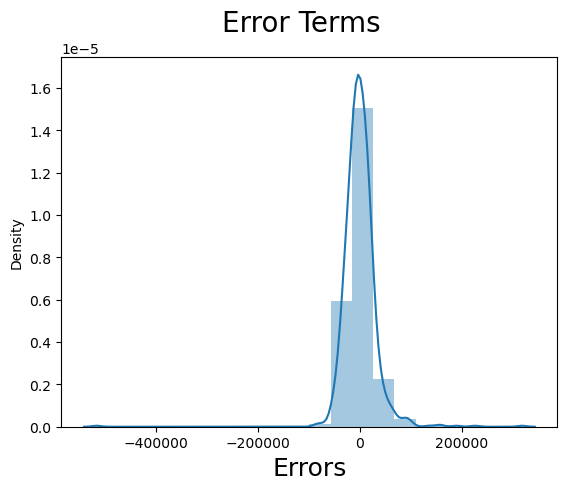

In [977]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Observation 

* The residual curve seems to be normally distributed

In [978]:
#evalate model
r2 = r2_score(y_true = y_train,y_pred = y_train_price)
round(r2,2)

0.82

In [979]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_train - y_train_price))
print(rss)
mse = mean_squared_error(y_train, y_train_price)
print(mse)
rmse = mse**0.5
print(rmse)

1158426023078.815
1134599434.9449706
33683.81562330744


In [980]:
# Residual analysis
y_res = (y_train - y_train_price)

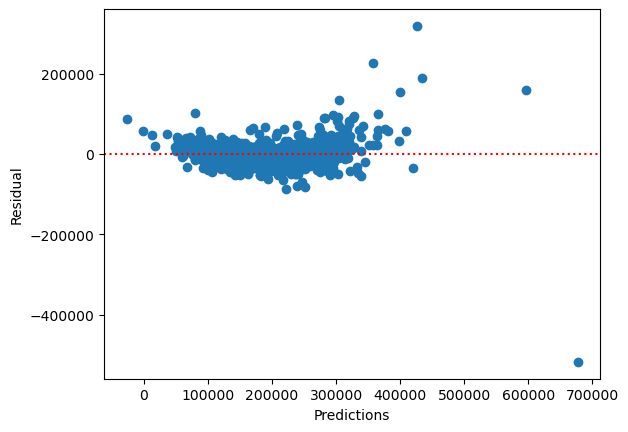

In [981]:
plt.scatter( y_train_price , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

### Making Predictions Using the Final Model

In [982]:
#drop the const
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

#Get the trained model columns
X_train_rfe.columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'ExterQual', 'BsmtFinSF1',
       '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'KitchenAbvGr', 'Functional',
       'PoolArea', 'BuildingAge', 'Condition2_PosN', 'RoofMatl_Membran',
       'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Heating_OthW'],
      dtype='object')

In [983]:

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [984]:
#Running the Linear Model on test data
test_lm = sm.OLS(y_test,X_test_new).fit()

#Let's see the summary of our linear model on test data
test_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     136.3
Date:                Mon, 27 Nov 2023   Prob (F-statistic):          2.49e-155
Time:                        20:39:10   Log-Likelihood:                -5181.1
No. Observations:                 439   AIC:                         1.040e+04
Df Residuals:                     422   BIC:                         1.047e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -5.314e+04   1.75e+04     -3.044      0.002   -8.75e+04   -1.88e+04
LotArea           1.377e+05   4.02e+04      3.423      0.001    5.86e+04    2.17e+05
OverallQual       1.246e+05    2.1e+04      5.947      0.000    8.34e+04    1.66e+05
OverallCond       4.107e+04   1.26e+04      3.270      0.001    1.64e+04    6.58e+04
ExterQual         6.615e+04   1.33e+04      4.987      0.000    4.01e+04    9.22e+04
BsmtFinSF1        1.395e+05   2.38e+04      5.854      0.000    9.27e+04    1.86e+05
1stFlrSF          4.348e+05   3.27e+04     13.284      0.000     3.7e+05    4.99e+05
2ndFlrSF          1.562e+05    1.2e+04     13.047      0.000    1.33e+05     1.8e+05
BedroomAbvGr     -9.413e+04   2.16e+04     -4.359      0.000   -1.37e+05   -5.17e+04
KitchenAbvGr     -3.486e+04   1.68e+04     -2.075      0.039   -6.79e+04   -1833.206
Functional        3.583e+04   1.45e+04      2.472      0.014    7339.668    6.43e+04
PoolArea           1.11e+04   2.03e+04      0.548      0.584   -2.87e+04    5.09e+04
BuildingAge      -4.399e+04   1.07e+04     -4.110      0.000    -6.5e+04    -2.3e+04
Condition2_PosN  -6489.2365   3.37e+04     -0.192      0.848   -7.28e+04    5.98e+04
RoofMatl_Membran  5.958e-11   7.67e-12      7.768      0.000    4.45e-11    7.47e-11
RoofMatl_WdShake -3.393e+04   3.34e+04     -1.015      0.311   -9.97e+04    3.18e+04
RoofMatl_WdShngl  3.158e+04   2.43e+04      1.299      0.195   -1.62e+04    7.94e+04
Heating_OthW     -5.999e+04   3.34e+04     -1.795      0.073   -1.26e+05    5702.069
==============================================================================
Omnibus:                      143.411   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1151.682
Skew:                           1.167   Prob(JB):                    8.23e-251
Kurtosis:                      10.584   Cond. No.                     8.32e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.96e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [985]:
# Making predictions
y_test_price = lm.predict(X_test_new)

In [986]:
#evalate model
r2 = r2_score(y_true = y_test,y_pred = y_test_price)
round(r2,2)

0.76

In [987]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_test - y_test_price))
print(rss)
mse = mean_squared_error(y_test, y_test_price)
print(mse)
rmse = mse**0.5
print(rmse)

686216695134.4141
1563135979.8050435
39536.514512600166


### Model Evaluation

* Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

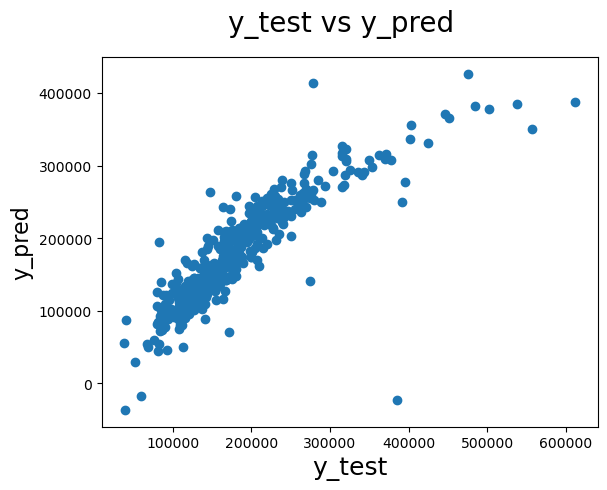

In [988]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_price)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

### Comparing Metrics of Train and Test model

In [989]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

y_pred_train = lm.predict(X_train_rfe)
# y_pred_test = test_lm.predict(X_test_new)
y_pred_test = y_test_price

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.8184813427732753
0.757153770770505
1158426023078.815
686216695134.4141
1134599434.9449706
1563135979.8050435


### Conclusion

1. VIF < 5
2. r2 score for Train Data set model = 0.81
3. r2 score for Test Data set model = 0.75

# Advanced Regression - Ridge Method

In [990]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.001, 0.01, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                   7.0, 8.0, 9.0, 10.0, 20]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 13 candidates, totalling 65 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                   7.0, 8.0, 9.0, 10.0, 20]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [991]:
# Find the best hypertuning parameter alpha
print(model_cv.best_params_)

{'alpha': 0.01}


In [992]:
#Fitting Ridge model for alpha = 0.05 and printing coefficients which have been penalised
alpha = 0.01
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
print(ridge.coef_)

[      0.          105020.59392374  137108.48556409   27210.74825455
   62886.58951438   93509.74776583  376146.97011555  130174.0904417
  -34037.56601385  -52618.50141702   49865.60063663  -90263.07431344
  -44393.41908998 -388865.7475733    68133.39889413  -41646.30879833
   85586.74800392  -71559.23534486]


In [993]:
#Check the R2 Score post training the dataset
y_train_pred = ridge.predict(X_train_rfe)
print(r2_score(y_train,y_train_pred))

0.8184772960408141


In [994]:
# Lets calculate metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_new)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8184772960408141
0.7585031927530591
1158451848744.6895
682403599513.5844
1134624729.4267282
1554450112.787208


##### Tune the model with different Alphas values

In [995]:
#Fitting Ridge model for alpha = 1 and printing coefficients which have been penalised
alpha = 0.5
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
print(ridge.coef_)

# Lets calculate metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_new)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

[      0.           99183.36727341  148650.4488637    26568.77625048
   66908.84455701   94763.96130698  323480.97600242  113976.27235922
  -15732.27199969  -44971.14498234   41282.58539235  -61919.43720264
  -44909.95420943 -243962.70439917   44825.12425934  -29059.04725875
   83631.79545628  -47900.51447312]
0.8137882715428714
0.7911826956572884
1188376530230.6606
590060306588.1531
1163933917.9536343
1344100926.1689136


In [996]:
#Fitting Ridge model for alpha = 1 and printing coefficients which have been penalised
alpha = 1
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
print(ridge.coef_)

# Lets calculate metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_new)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

[      0.           92829.48726967  154421.68904101   25728.8078017
   70192.18336872   95128.39593014  289658.58495208  104189.98876121
   -4944.00695158  -40056.90088542   36019.85017204  -45030.86797574
  -45369.7690461  -174166.72330382   33493.43903657  -21421.16048092
   79904.22664398  -35659.53160326]
0.8073908537404988
0.7990278933176302
1229203932636.5715
567891934329.5562
1203921579.4677489
1293603495.0559366


In [997]:
#Fitting Ridge model for alpha = 2 and printing coefficients which have been penalised
alpha = 1.5
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
print(ridge.coef_)

# Lets calculate metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_new)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

print(ridge.coef_)

[      0.           87010.79112509  157361.69300654   24898.02511318
   72904.58189138   94664.08959426  265416.56316118   97520.42411032
    2077.13033682  -36548.2107046    32400.79787695  -33876.01702517
  -45881.28029329 -134100.33955717   26885.74925855  -16322.60342408
   75910.44983693  -28257.10238855]
0.8016018401681997
0.8001206918747091
1266148586550.1995
564803985973.6536
1240106353.1343775
1286569444.1313293
[      0.           87010.79112509  157361.69300654   24898.02511318
   72904.58189138   94664.08959426  265416.56316118   97520.42411032
    2077.13033682  -36548.2107046    32400.79787695  -33876.01702517
  -45881.28029329 -134100.33955717   26885.74925855  -16322.60342408
   75910.44983693  -28257.10238855]


In [998]:
#Fitting Ridge model for alpha = 2 and printing coefficients which have been penalised
alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
print(ridge.coef_)

# Lets calculate metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_new)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

print(ridge.coef_)

[      0.           81848.67193342  158732.19393347   24110.4450293
   75192.68285854   93646.19458499  246718.88223693   92594.89183026
    6960.50665348  -33861.91713508   29715.35214536  -25969.62343514
  -46440.25331517 -108252.19055207   22545.22716482  -12681.61900582
   72063.33272216  -23288.22467561]
0.7964447476629946
0.7987984655067027
1299060410892.269
568540234262.7528
1272341244.7524672
1295080260.2796192
[      0.           81848.67193342  158732.19393347   24110.4450293
   75192.68285854   93646.19458499  246718.88223693   92594.89183026
    6960.50665348  -33861.91713508   29715.35214536  -25969.62343514
  -46440.25331517 -108252.19055207   22545.22716482  -12681.61900582
   72063.33272216  -23288.22467561]


In [999]:
#Fitting Ridge model for alpha = 2 and printing coefficients which have been penalised
alpha = 3
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
print(ridge.coef_)

# Lets calculate metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_new)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

print(ridge.coef_)

[     0.          73254.52558051 158951.36988194  22666.75178156
  78833.61941763  90710.69873937 219010.4945599   85674.88854469
  13132.57738446 -29942.94783757  25938.87171791 -15614.43176514
 -47627.10469337 -77076.14940476  17166.73840397  -7871.38083534
  65195.88456314 -17039.0232198 ]
0.7874545924001354
0.7936213094199891
1356434291721.538
583169454371.6732
1328535055.5548854
1328404224.0812602
[     0.          73254.52558051 158951.36988194  22666.75178156
  78833.61941763  90710.69873937 219010.4945599   85674.88854469
  13132.57738446 -29942.94783757  25938.87171791 -15614.43176514
 -47627.10469337 -77076.14940476  17166.73840397  -7871.38083534
  65195.88456314 -17039.0232198 ]


In [1000]:
#Fitting Ridge model for alpha = 2 and printing coefficients which have been penalised
alpha = 5
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
print(ridge.coef_)

# Lets calculate metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_new)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

print(ridge.coef_)

[     0.          60898.6891577  155204.01804147  20177.42906402
  83634.44148269  83772.82825059 183251.69360232  77423.74606004
  18779.04736998 -25086.33849965  21493.71899241  -5101.8094785
 -49948.94369438 -47474.65114634  11784.51136947  -2910.99438828
  54614.66511538 -10781.73296996]
0.7724034026626618
0.7809543538013572
1452488824828.8882
618962789312.9275
1422613932.2516046
1409938016.6581492
[     0.          60898.6891577  155204.01804147  20177.42906402
  83634.44148269  83772.82825059 183251.69360232  77423.74606004
  18779.04736998 -25086.33849965  21493.71899241  -5101.8094785
 -49948.94369438 -47474.65114634  11784.51136947  -2910.99438828
  54614.66511538 -10781.73296996]


In [1001]:
#Choosing alpha = 1.5 looking at different alphas and R2 scores for both Test and Train data
alpha = 1.5
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
print(ridge.coef_)

# Lets calculate metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_new)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

print(ridge.coef_)

[      0.           87010.79112509  157361.69300654   24898.02511318
   72904.58189138   94664.08959426  265416.56316118   97520.42411032
    2077.13033682  -36548.2107046    32400.79787695  -33876.01702517
  -45881.28029329 -134100.33955717   26885.74925855  -16322.60342408
   75910.44983693  -28257.10238855]
0.8016018401681997
0.8001206918747091
1266148586550.1995
564803985973.6536
1240106353.1343775
1286569444.1313293
[      0.           87010.79112509  157361.69300654   24898.02511318
   72904.58189138   94664.08959426  265416.56316118   97520.42411032
    2077.13033682  -36548.2107046    32400.79787695  -33876.01702517
  -45881.28029329 -134100.33955717   26885.74925855  -16322.60342408
   75910.44983693  -28257.10238855]


# Advanced Regression - Lasso Method

In [1002]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 13 candidates, totalling 65 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                   7.0, 8.0, 9.0, 10.0, 20]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1003]:
# Find the best hypertuning parameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [1004]:
#Fitting Lasso model for alpha = 1 and printing coefficients which have been penalised

alpha =1.0

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rfe, y_train) 

Lasso()

In [1005]:
lasso.coef_

array([      0.        ,  104865.00861977,  136898.68088658,
         27189.62530742,   62802.86628231,   93367.64706509,
        377134.629268  ,  130421.8787777 ,  -34287.51353513,
        -52715.87990894,   49925.04270058,  -90477.65556204,
        -44397.2878488 , -392130.67796311,   67814.43338473,
        -41639.3165918 ,   85450.882929  ,  -71252.43433282])

In [1006]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_rfe)
y_pred_test = lasso.predict(X_test_new)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8184803857137526
0.7576074908330704
1158432130895.3545
684934606947.0138
1134605417.1355088
1560215505.5740633


##### Tune the model with different Alphas

In [1007]:
#Fitting Lasso model for alpha = 100 and printing coefficients which have been penalised

alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rfe, y_train) 
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_rfe)
y_pred_test = lasso.predict(X_test_new)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

print(lasso.coef_)

0.81071034104444
0.7882183872785696
1208019440998.546
598436627297.1779
1183172811.9476454
1363181383.3648698
[      0.           77024.39711667  150565.2479104    23026.09126305
   64161.7399826    83130.26327065  332183.20215791  109880.08271146
   -6865.1004732   -42257.95414434   33935.60239737  -33013.62807822
  -45029.32945923 -258065.83753912       0.           -6129.96144873
   72630.47367412      -0.        ]


In [1008]:
#Fitting Lasso model for alpha = 200 and printing coefficients which have been penalised

alpha =200

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rfe, y_train) 
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_rfe)
y_pred_test = lasso.predict(X_test_new)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

print(lasso.coef_)

0.7973319579887919
0.7997122098624001
1293398361904.8525
565958243865.1509
1266795653.1879065
1289198733.1780202
[      0.           42865.60035555  161895.70554542   16951.69009115
   63466.15539082   72527.37853044  304595.36847946   98395.773988
      -0.          -32190.08577844   23479.73443291      -0.
  -43244.33576616 -132522.21821412       0.              -0.
   56232.34492592      -0.        ]


In [1009]:
#Fitting Lasso model for alpha = 300 and printing coefficients which have been penalised

alpha =300

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rfe, y_train) 
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_rfe)
y_pred_test = lasso.predict(X_test_new)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

print(lasso.coef_)

0.7792035399546098
0.7972444399939859
1409091324429.456
572931483222.5354
1380109034.7007406
1305083105.2905135
[     0.           8747.93066732 171844.9804606   10573.74804837
  61886.27161893  64892.33557252 285023.49139962  90773.28227674
     -0.         -22566.13465686  14075.50953743     -0.
 -40886.78955628 -12683.83566704      0.             -0.
  37790.169454       -0.        ]


In [1010]:
#Choosing alpha as 200 looking at different alphas and R2 scores for both Test and Train data

alpha =200

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rfe, y_train) 
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_rfe)
y_pred_test = lasso.predict(X_test_new)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

print(lasso.coef_)

0.7973319579887919
0.7997122098624001
1293398361904.8525
565958243865.1509
1266795653.1879065
1289198733.1780202
[      0.           42865.60035555  161895.70554542   16951.69009115
   63466.15539082   72527.37853044  304595.36847946   98395.773988
      -0.          -32190.08577844   23479.73443291      -0.
  -43244.33576616 -132522.21821412       0.              -0.
   56232.34492592      -0.        ]


In [1011]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),8.184813e-01,8.016018e-01,7.973320e-01
1,R2 Score (Test),7.571538e-01,8.001207e-01,7.997122e-01
2,RSS (Train),1.158426e+12,1.266149e+12,1.293398e+12
3,RSS (Test),6.862167e+11,5.648040e+11,5.659582e+11
4,MSE (Train),3.368382e+04,3.521514e+04,3.559207e+04
5,MSE (Test),3.953651e+04,3.586878e+04,3.590541e+04


In [1012]:
#creating coeffcients for the ridge regression
model_parameter = list(lasso.coef_)
model_parameter.insert(0,lasso.intercept_)
cols = X_train_rfe.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_parameter,(abs(ele) for ele in model_parameter))))
lasso_coef.columns = ['Features','Coefficient','Mod']

In [1013]:
#selecting the top 15 variables
lasso_coef.sort_values(by='Mod',ascending=False).head(15)

,Features,Coefficient,Mod
7,2ndFlrSF,304595.368479,304595.368479
3,OverallCond,161895.705545,161895.705545
14,RoofMatl_Membran,-132522.218214,132522.218214
8,BedroomAbvGr,98395.773988,98395.773988
6,1stFlrSF,72527.378530,72527.378530
5,BsmtFinSF1,63466.155391,63466.155391
17,Heating_OthW,56232.344926,56232.344926
13,Condition2_PosN,-43244.335766,43244.335766
2,OverallQual,42865.600356,42865.600356
0,const,-40940.879988,40940.879988


### Conclusion

Choosing the Lasso model given R2 score is good with less number features

Variables which are significant in predicting the price of a house:

##### Negatively affecting the pricing:
1. Membrane type Roof material
2. Proximity to various conditions
3. Evaluates the quality of the material on the exterior 

##### Positively affecting the pricing:

1. House having Second Floor
2. Overall condition of the house
3. Bedroom above grade
4. First Floor square feet
5. Type 1 finished square feet
6. Type of heating
7. Overall material and finish of the house

# Questions

### 1: Double the values of Alpha for lasso & Ridge

In [1014]:
#earlier for Ridge alpha = 1.5 now take 3
alpha = 3
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
print(ridge.coef_)
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_new)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

[     0.          73254.52558051 158951.36988194  22666.75178156
  78833.61941763  90710.69873937 219010.4945599   85674.88854469
  13132.57738446 -29942.94783757  25938.87171791 -15614.43176514
 -47627.10469337 -77076.14940476  17166.73840397  -7871.38083534
  65195.88456314 -17039.0232198 ]
0.7874545924001354
0.7936213094199891


##### Both the Training and Test R2 score has dropped slightly.  Training has dropped by about 1%

In [1015]:
#earlier for Lasso alpha = 200 now take 400
alpha =400

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rfe, y_train) 
print(lasso.coef_)
y_pred_train = lasso.predict(X_train_rfe)
y_pred_test = lasso.predict(X_test_new)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

[     0.              0.         180375.47843443   4214.51198333
  61837.69613468  58454.4756441  267626.35891012  84694.27390269
      0.         -13258.76629596   5229.09803018     -0.
 -38321.45376984     -0.              0.             -0.
  15535.39557697     -0.        ]
0.7691440334536939
0.7881082796484


##### Both the Training and Test R2 score has dropped

In [1016]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train_rfe.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param,(abs(ele) for ele in model_param))))
lasso_coef.columns = ['Feature','Coef','Mod']
#selecting the top 10 variables
lasso_coef.sort_values(by='Mod',ascending=False).head(10)

,Feature,Coef,Mod
7,2ndFlrSF,267626.358910,267626.358910
3,OverallCond,180375.478434,180375.478434
8,BedroomAbvGr,84694.273903,84694.273903
5,BsmtFinSF1,61837.696135,61837.696135
6,1stFlrSF,58454.475644,58454.475644
13,Condition2_PosN,-38321.453770,38321.453770
17,Heating_OthW,15535.395577,15535.395577
0,const,-15327.688843,15327.688843
10,Functional,-13258.766296,13258.766296
11,PoolArea,5229.098030,5229.098030


###  2: Drop the Top 5 features and rebuild lasso

In [1017]:
X_train_rfe = X_train_rfe.drop(['2ndFlrSF','OverallCond','BedroomAbvGr','BsmtFinSF1','1stFlrSF'],axis=1)
X_test_new = X_test_new.drop(['2ndFlrSF','OverallCond','BedroomAbvGr','BsmtFinSF1','1stFlrSF'],axis=1)

X_train_rfe.head()
X_train_rfe.shape

(1021, 13)

In [1018]:
X_test_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 439 entries, 1436 to 210
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   const             439 non-null    float64
 1   LotArea           439 non-null    float64
 2   OverallQual       439 non-null    float64
 3   ExterQual         439 non-null    float64
 4   KitchenAbvGr      439 non-null    float64
 5   Functional        439 non-null    float64
 6   PoolArea          439 non-null    float64
 7   BuildingAge       439 non-null    float64
 8   Condition2_PosN   439 non-null    float64
 9   RoofMatl_Membran  439 non-null    float64
 10  RoofMatl_WdShake  439 non-null    float64
 11  RoofMatl_WdShngl  439 non-null    float64
 12  Heating_OthW      439 non-null    float64
dtypes: float64(13)
memory usage: 48.0 KB


In [1019]:
lasso_modified = Lasso()
#param = {'alpha': [0.0001, 0.001, 0.01]}
folds = 5
# cross validation
lasso_cv_model_modified = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv_model_modified.fit(X_train_rfe, y_train)

Fitting 5 folds for each of 13 candidates, totalling 65 fits


GridSearchCV(cv=5, estimator=Lasso(alpha=400),
             param_grid={'alpha': [0.001, 0.01, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                   7.0, 8.0, 9.0, 10.0, 20]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1020]:
# Find the best hypertuning parameter alpha
print(lasso_cv_model_modified.best_params_)

{'alpha': 20}


In [1021]:
#Choosing alpha as 20 looking at different alphas and R2 scores for both Test and Train data

alpha =20

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rfe, y_train) 
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_rfe)
y_pred_test = lasso.predict(X_test_new)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

print(lasso.coef_)

0.6961085782397282
0.6918007000176243
1939391446234.7014
870886510149.522
1899501906.204409
1983796150.6822824
[      0.          282715.90431558  292430.13892242   89218.1696898
   13700.74628234    7692.16221851   39800.60944771  -24240.79664712
 -195164.78724543       0.            4318.94896464  101785.16803394
  -63128.30629704]


##### After dropping the top 5 features model r2 score dropped down to 69% for Train and 69% for Test.

In [1022]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train_rfe.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param,(abs(ele) for ele in model_param))))
lasso_coef.columns = ['Feature','Coef','Mod']
#selecting the top 10 variables
lasso_coef.sort_values(by='Mod',ascending=False).head(10)

,Feature,Coef,Mod
3,ExterQual,292430.138922,292430.138922
2,OverallQual,282715.904316,282715.904316
9,RoofMatl_Membran,-195164.787245,195164.787245
12,Heating_OthW,101785.168034,101785.168034
4,KitchenAbvGr,89218.169690,89218.169690
0,const,-40078.041611,40078.041611
7,BuildingAge,39800.609448,39800.609448
8,Condition2_PosN,-24240.796647,24240.796647
5,Functional,13700.746282,13700.746282
6,PoolArea,7692.162219,7692.162219
